# Non-physician anesthesthetist (NPA)

In [1]:
# import needed python modules
import sys, os
sys.path.append(os.path.join(os.path.dirname(''), '..'))
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from lib import stats_util as su
import config
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import seaborn as sns
import titlecase

# maximizes output
verbose = False

# function for easy printing
def nprint(q):
    print list(q.astype(str))
    
# import other notebooks in the next cell

In [2]:
# output was 8 in 2011 [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/RuQLaJGIRw.jpg)
# better output data, HRH audit June 2015 [Supporting image](https://github.com/alexgoodell/uganda-model/blob/master/docs/imgs/VNslDzD5Rj.jpg)



# Notes on reading python code
# NaN = not a number, the python equivlent of "null"/"nil"/"NA"
# pandas (pd) is the main data analysis tool and uses dataframes (df), similar to R

# read in data for allied health professionals from IHRIS
df = pd.read_csv(config.data_path + "/ihris/registered-allied-health-professionals-11-3-2018.csv", skiprows=0, header=0)

In [3]:
# Cleaning
df = su.clean_columns(df)
# show all columns of first 2 rows
df.head(2).T

,0,1
#,1,2
surname,Okello,Rwamwiza
first_name,Alex,Innocent
other_names,Morriesh,NaN
cadre,Clinical Officer,Clinical Officer
registration_number,14480,14479
registration_date,23 November 2010,9 November 2010
training_qualification,Diploma In Clinical Medicine And Community Health,Diploma In Clinical Medicine And Community Health
training_institution,Gulu School Of Clinical Officers,Fortportal School Of Clinical Officers
telephone_number,0784796713,0782635445


In [4]:
# Strip and titlecase the names
df['surname'] = df[df.surname.notnull()].surname.apply(lambda x: titlecase.titlecase(str.strip(str(x))))
df['first_name'] = df[df.first_name.notnull()].first_name.apply(lambda x: titlecase.titlecase(str.strip(str(x))))
df['other_names'] = df[df.other_names.notnull()].other_names.apply(lambda x: titlecase.titlecase(str.strip(str(x))))


In [5]:
# Lets look for the anesthesia titles
all_specialties = df.cadre.unique()
all_specialties

array(['Clinical Officer', 'Medical Laboratory Technician',
       'Health Assistant', 'Medical Laboratory Scientific Officer',
       'Medical Laboratory Assistant', 'Public Health Dental Officer',
       'Ophthalmic Clinical Officer', 'Theatre Assistant',
       'Health Inspector', 'Medical Laboratory Technologist',
       'Orthopedic Officer', 'Environmental Health Officer',
       'Physiotherapist', 'Anaesthetic Officer',
       'Psychiatric Clinical Officer', 'Dispenser',
       'Orthopedic Technologist', 'Prosthetics-Orthotics',
       'Anaesthetic Clinical Officer', 'Occupational Therapist',
       'Medical Radiographer', 'Vector Control Officer',
       'Ear Nose And Throat Clinical Officer', 'Dental Technologist',
       'Medical Imaging Technologist', nan,
       'Medical Laboratory Scientist', 'Pharmacy Assistant',
       'Medical Sonographer', 'Anaesthetic Assistant'], dtype=object)

In [6]:
"Best ten results: {}".format(process.extract("anesthesia", all_specialties, limit=10))

"Best ten results: [('Anaesthetic Officer', 72), ('Anaesthetic Clinical Officer', 72), ('Anaesthetic Assistant', 72), ('Health Assistant', 51), ('Theatre Assistant', 51), ('Medical Laboratory Assistant', 45), ('Public Health Dental Officer', 45), ('Environmental Health Officer', 45), ('Physiotherapist', 45), ('Prosthetics-Orthotics', 45)]"

In [7]:
# Make a df of only the top few
ao = ['Anaesthetic Officer','Anaesthetic Clinical Officer']
aa = ['Anaesthetic Assistant']
either = ao + aa
aodf = df[df.cadre.isin(ao)]
aadf = df[df.cadre.isin(aa)]
adf = df[df.cadre.isin(either)]
adf

,#,surname,first_name,other_names,cadre,registration_number,registration_date,training_qualification,training_institution,telephone_number,email_address,person_residence,person_nationality
68,69,Rukundo,Justus,NaN,Anaesthetic Officer,19301,1 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0757065406,rukundojustus@gmail.com,"RUKUNGIRI, Western, Uganda",Uganda
84,85,Balayo,James,NaN,Anaesthetic Officer,17434,10 February 2010,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0772311371,NaN,"KAMPALA, Central, Uganda",Uganda
89,90,Ssenteza,Kajubi,Derrick,Anaesthetic Officer,15910,24 January 2011,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0772672900,ssenteza.kajubi@gmail.com,"NAKASEKE, Central, Uganda",Uganda
98,99,Kasuubo,Florence,NaN,Anaesthetic Officer,19304.,6 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0776571489,NaN,"LUUKA, Eastern, Uganda",Uganda
99,100,Kasuubo,Florence,NaN,Anaesthetic Officer,19304.,6 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0776571489,NaN,"LUUKA, Eastern, Uganda",Uganda
111,112,Nakamya,Magoola,Catherine,Anaesthetic Officer,4062,5 December 2012,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0712728740,nakamyam@yahoo.com,"KAMPALA, Central, Uganda",Uganda
190,191,Nakaggwa,Bernadette,NaN,Anaesthetic Officer,19580,14 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0712835747,NaN,"KAMPALA, Central, Uganda",Uganda
241,242,Kuule,Yason,NaN,Anaesthetic Officer,19200,15 November 2012,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0777887083,kuuleyason@yahoo.com,"KAMPALA, Central, Uganda",Uganda
354,355,Benda,Margaret,NaN,Anaesthetic Officer,19432,31 October 2012,Diploma In Anaesthesia,Fortportal School Of Clinical Officers,0773267948,NaN,"LUWERO, Central, Uganda",Uganda
403,404,Taabu,Geofrey,NaN,Anaesthetic Clinical Officer,19316,15 March 2017,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0774515164,taabugeofrey@gmail.com,"AMURU, Northern, Uganda",Uganda


In [8]:
# Descriptive
print su.pt(pd.crosstab(
        adf.cadre, columns="count"),
        title = "Cadres of anes allied")



        Cadres of anes allied         

|:-----------------------------|----:|
| Anaesthetic Assistant        |   3 |
| Anaesthetic Clinical Officer | 238 |
| Anaesthetic Officer          | 170 |


In [9]:
# Training qualifications of just ao's
print su.pt(pd.crosstab(
        aodf.training_qualification, columns="count"),
        title = "Training qualification of AOs")



               Training qualification of AOs               

|:--------------------------------------------------|----:|
| Certificate In Environmental Health Science       |   1 |
| Certificate in Anaesthesia                        |   2 |
| Certificate of Nursing in Anesthesia              |   1 |
| Diploma In Anaesthesia                            | 315 |
| Diploma In Clinical Medicine And Community Health |   1 |
| Diploma In Public Health Dentistry                |   2 |
| Post Basic Diploma In Anaesthesia                 |  78 |


In [10]:
# Training qualifications of just aa's
pd.crosstab(aadf.training_qualification, [aadf.training_institution]).T

training_qualification,Certificate in Anaesthesia
training_institution,
Mbale School Of Clinical Officers,3


In [11]:
# AO training by institution for those with classic training ie...
# ...'Diploma In Anaesthesia', 'Post Basic Diploma In Anaesthesia'
ao_diplomas = ['Diploma In Anaesthesia', 'Post Basic Diploma In Anaesthesia']
q = aodf[aodf.training_qualification.isin(ao_diplomas)]
pd.crosstab(q.training_qualification,[q.training_institution]).T

training_qualification,Diploma In Anaesthesia,Post Basic Diploma In Anaesthesia
training_institution,,
Ataturk University,1,0
Fortportal School Of Clinical Officers,12,0
Gulu Institute Of Health Sciences,2,0
Jinja Medical Laboratory Training School,7,0
Kabale Institute Of Health Sciences,1,0
Kenya Medical Training College Nairobi,1,0
Kigali Health Institute,1,0
Masaka Regional Refferal Hospital,2,0
Masaka School of Anaesthetic Assistants,1,0


In [12]:
# AO training by institution for those with non-classic training
q = aodf[~aodf.training_qualification.isin(ao_diplomas)]
pd.crosstab(q.training_qualification,[q.training_institution]).T

# Note below that some of the AOs hold only certificates. For this reason, 
# we'll group AA's and AO's from now on, under non-physician anesthesthetist (NPA)
# this is = adf

training_qualification,Certificate In Environmental Health Science,Certificate in Anaesthesia,Certificate of Nursing in Anesthesia,Diploma In Clinical Medicine And Community Health,Diploma In Public Health Dentistry
training_institution,,,,,
Makerere University,0,0,1,0,0
Mbale School Of Clinical Officers,0,2,0,1,0
Mbale School Of Hygiene,1,0,0,0,0
Mulago Paramedical Training Schools,0,0,0,0,2


In [13]:
# Group diplomas by certificate, Diploma, Post-basic, missing, and other
anes_qual = ao_diplomas + ['Certificate in Anaesthesia']
adf.loc[:, "colapsed_qual"] = 0
adf.loc[(~adf.training_qualification.isin(anes_qual))
        & (~adf.training_qualification.isnull()),
        "colapsed_qual"] = 'Other qualification'
adf.loc[adf.training_qualification.isnull(),
        "colapsed_qual"] = 'No qualification listed'
adf.loc[adf.training_qualification.isin(anes_qual),
        "colapsed_qual"] = adf.loc[adf.training_qualification.isin(anes_qual),
        "training_qualification"]
adf.colapsed_qual.unique()

/Users/alexgoodell/.virtualenvs/uganda/lib/python2.7/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/alexgoodell/.virtualenvs/uganda/lib/python2.7/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array(['Post Basic Diploma In Anaesthesia', 'Diploma In Anaesthesia',
       'Other qualification', 'Certificate in Anaesthesia',
       'No qualification listed'], dtype=object)

In [14]:
# Training years
x = [0, 1990, 2000, 2010, 2020]
y = ['Before 1990', '1991-2000', '2001-2010', '2011-2020']
adf.loc[:,"reg_year"] = adf.registration_date.apply(lambda x: float(x[-4:]))
reg_years = {}
for qual in adf.colapsed_qual.unique():
    reg_years[qual] = pd.cut(adf[adf.colapsed_qual == qual].reg_year, x, labels=y).value_counts()

# mmed_years = pd.cut(ddf[ddf.degree == 'MMed in Anesthesia'].year, x, labels=y).value_counts()
l = pd.DataFrame(reg_years, index=y)
print su.pt(l.T, title="NPA registration by training")





                                 NPA registration by training                                  

|                                   |   Before 1990 |   1991-2000 |   2001-2010 |   2011-2020 |
|:----------------------------------|--------------:|------------:|------------:|------------:|
| Certificate in Anaesthesia        |             0 |           0 |           3 |           2 |
| Diploma In Anaesthesia            |             0 |          55 |         113 |         147 |
| No qualification listed           |             1 |           0 |           6 |           1 |
| Other qualification               |             0 |           1 |           3 |           1 |
| Post Basic Diploma In Anaesthesia |             0 |           7 |          43 |          28 |


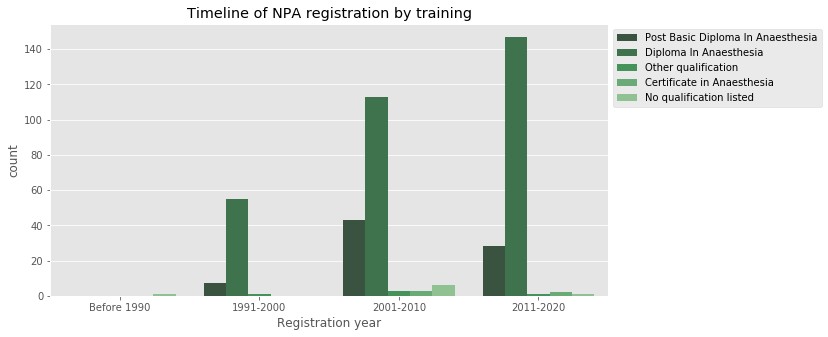

In [15]:
# When did they get they register? (Histogram)

%matplotlib inline
plt.figure(figsize=(10, 5))
l = adf
l.loc[:,"reg_year_bin"] = pd.cut(l.reg_year, x, labels=y)
sns.countplot(x='reg_year_bin', hue='colapsed_qual', data=l, palette="Greens_d")
_ = plt.xlabel("Registration year")
_ = plt.title("Timeline of NPA registration by training")
_ = plt.legend(bbox_to_anchor=(1, 1))

In [16]:
# Cumulative registered NPAs assuming no drop-outs (1999-)

adf.loc[:, "dummy"] = 1
p = pd.pivot_table(adf.reset_index(), 
                   values='dummy',
                   index=['reg_year'], 
                   columns=['colapsed_qual'], 
                   aggfunc='sum').fillna(0).cumsum()
# sort
p = p.T.sort_values(2017, ascending=False).T
p

colapsed_qual,Diploma In Anaesthesia,Post Basic Diploma In Anaesthesia,No qualification listed,Certificate in Anaesthesia,Other qualification
reg_year,,,,,
1943.0,0.0,0.0,1.0,0.0,0.0
1999.0,52.0,4.0,1.0,0.0,1.0
2000.0,55.0,7.0,1.0,0.0,1.0
2001.0,62.0,8.0,1.0,0.0,1.0
2002.0,70.0,11.0,1.0,0.0,2.0
2003.0,77.0,11.0,1.0,0.0,2.0
2004.0,85.0,11.0,1.0,0.0,2.0
2005.0,102.0,18.0,2.0,0.0,2.0
2006.0,115.0,21.0,4.0,0.0,2.0


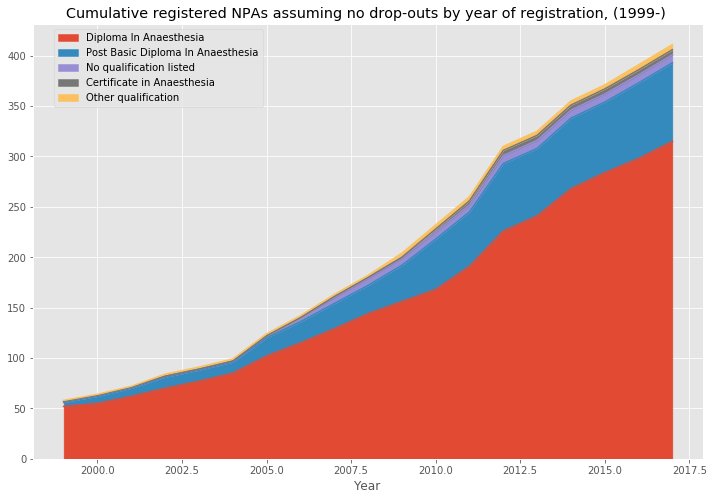

In [17]:
# Chart since 90's (ignoring the one person who trained in 1943...)

p.loc[1990:].plot.area(figsize=(12, 8))
_ = plt.xlabel("Year")
_ = plt.title("Cumulative registered NPAs assuming no drop-outs by year of registration, (1999-) ")
_ = plt.legend(bbox_to_anchor=(.35, 1))

# NPA - location
find anesthesthetists were located by linking their district to the district in the "facilities" notebook - this next hidden cell does that

importing Jupyter notebook from ../notebooks/Facilities.ipynb


Ownership
| Name   |   Count |
|:-------|--------:|
| Govt   |    3084 |
| PFP    |    2365 |
| PNFP   |     945 |


Authority
| Name       |   Count |
|:-----------|--------:|
| MOH        |    2921 |
| Private    |    2365 |
| NGO        |     349 |
| CBO        |     213 |
| UEC (UCMB) |     183 |
| UPMB       |      92 |
| UPS        |      64 |
| UPF        |      53 |
| UMMB       |      32 |
| UPDF       |      30 |
| UEC        |      18 |
| (UCMB)     |         |
| SDA        |      17 |
| UBTS       |      14 |
| TASO       |      12 |
| AIC        |       9 |
| CAFU       |       7 |
| Orthodox   |       6 |
| Other NGO  |       2 |
| UCMB       |       2 |
| UNHCR      |       2 |
| SOS        |       2 |
| UEC        |       1 |


Level
| Name     |   Count |
|:---------|--------:|
| HC II    |    4200 |
| HC III   |    1508 |
| Clinic   |     258 |
| HC IV    |     215 |
| Hospital |     146 |
| SC       |   

importing Jupyter notebook from ../notebooks/Facilities.ipynb


Ownership
| Name   |   Count |
|:-------|--------:|
| Govt   |    3084 |
| PFP    |    2365 |
| PNFP   |     945 |


Authority
| Name       |   Count |
|:-----------|--------:|
| MOH        |    2921 |
| Private    |    2365 |
| NGO        |     349 |
| CBO        |     213 |
| UEC (UCMB) |     183 |
| UPMB       |      92 |
| UPS        |      64 |
| UPF        |      53 |
| UMMB       |      32 |
| UPDF       |      30 |
| UEC        |      18 |
| (UCMB)     |         |
| SDA        |      17 |
| UBTS       |      14 |
| TASO       |      12 |
| AIC        |       9 |
| CAFU       |       7 |
| Orthodox   |       6 |
| Other NGO  |       2 |
| UCMB       |       2 |
| UNHCR      |       2 |
| SOS        |       2 |
| UEC        |       1 |


Level
| Name     |   Count |
|:---------|--------:|
| HC II    |    4200 |
| HC III   |    1508 |
| Clinic   |     258 |
| HC IV    |     215 |
| Hospital |     146 |
| SC       |   

<module 'notebooks.Facilities' from '../notebooks/Facilities.ipynb'>

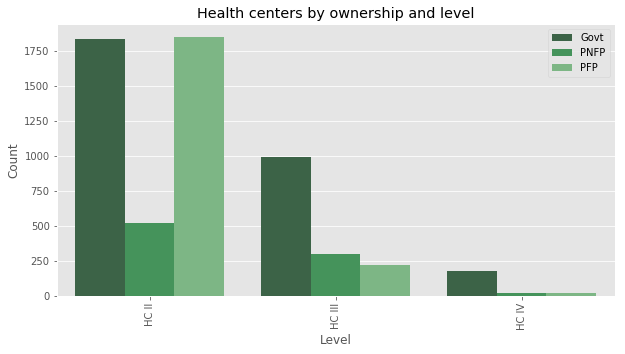

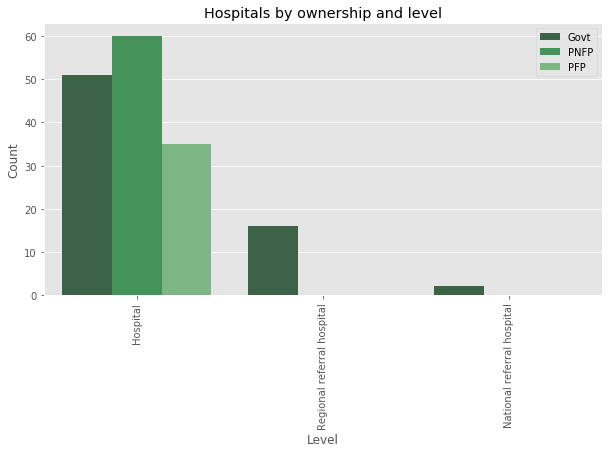

In [18]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
sys.path.append(os.path.join(os.path.dirname(''), '..'))

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

import notebooks.Facilities as fac
reload(fac)

In [19]:
# Seperate district from rest of person_residence field
def isNaN(num):
    return num != num
def fmt_dist(x):
    if isNaN(x):
        return "Unknown location"
    else:
        return titlecase.titlecase(str(x).split(",")[0]) + " District"
adf.loc[:, "person_district_name"] = adf.person_residence.apply(fmt_dist)
pd.crosstab(adf.person_district_name, columns="count")

col_0,count
person_district_name,
Abim District,4
Adjumani District,2
Agago District,3
Amolatar District,1
Amuru District,3
Apac District,1
Arua District,5
Budaka District,1
Bududa District,2


In [20]:
# Join this adf with the districts df
# adf = 
adf = adf.join(fac.districts.set_index('district_name'), 
                             on="person_district_name",
                             how="left")
adf

,#,surname,first_name,other_names,cadre,registration_number,registration_date,training_qualification,training_institution,telephone_number,...,is_hard_to_reach,pop_per_health_fac,rural_pop,public_hosp,is_district,poverty_pop,is_city,distance_from_kampala,district_name_all_caps,prop_rural
68,69,Rukundo,Justus,NaN,Anaesthetic Officer,19301,1 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0757065406,...,0.0,3803.895996,284517.000000,0.0,2.0,0.076,0.0,730.0,RUKUNGIRI,0.971379
84,85,Balayo,James,NaN,Anaesthetic Officer,17434,10 February 2010,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0772311371,...,0.0,1098.000000,0.000000,1.0,2.0,0.037,0.0,0.0,KAMPALA,0.000000
89,90,Ssenteza,Kajubi,Derrick,Anaesthetic Officer,15910,24 January 2011,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0772672900,...,0.0,7660.714355,171805.756348,1.0,2.0,0.073,0.0,242.0,NAKASEKE,0.800959
98,99,Kasuubo,Florence,NaN,Anaesthetic Officer,19304.,6 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0776571489,...,0.0,6908.108398,244686.515625,0.0,2.0,0.243,0.0,268.0,LUUKA,0.957302
99,100,Kasuubo,Florence,NaN,Anaesthetic Officer,19304.,6 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0776571489,...,0.0,6908.108398,244686.515625,0.0,2.0,0.243,0.0,268.0,LUUKA,0.957302
111,112,Nakamya,Magoola,Catherine,Anaesthetic Officer,4062,5 December 2012,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0712728740,...,0.0,1098.000000,0.000000,1.0,2.0,0.037,0.0,0.0,KAMPALA,0.000000
190,191,Nakaggwa,Bernadette,NaN,Anaesthetic Officer,19580,14 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0712835747,...,0.0,1098.000000,0.000000,1.0,2.0,0.037,0.0,0.0,KAMPALA,0.000000
241,242,Kuule,Yason,NaN,Anaesthetic Officer,19200,15 November 2012,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0777887083,...,0.0,1098.000000,0.000000,1.0,2.0,0.037,0.0,0.0,KAMPALA,0.000000
354,355,Benda,Margaret,NaN,Anaesthetic Officer,19432,31 October 2012,Diploma In Anaesthesia,Fortportal School Of Clinical Officers,0773267948,...,0.0,8281.356445,386156.564453,0.0,2.0,0.073,0.0,126.2,LUWERO,0.790333
403,404,Taabu,Geofrey,NaN,Anaesthetic Clinical Officer,19316,15 March 2017,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0774515164,...,1.0,5865.714355,194629.738281,0.0,2.0,0.354,0.0,756.0,AMURU,0.948026


In [21]:
# How many NPAs in the "hard to reach" areas?
pd.crosstab(adf.is_hard_to_reach.fillna("Unknown"), columns="count")

col_0,count
is_hard_to_reach,
0.0,308
1.0,53
Unknown,50


In [22]:
# Distribution of NPA by district poverty level (proportion of population in poverty)
quartile_cutoffs = adf.poverty_pop.quantile([0,0.25,0.50,0.75,1]).values
quartile_labels = ["4th","3rd","2nd","1st"]
print su.pt(pd.crosstab(pd.cut(adf.poverty_pop.fillna("Unknown"), quartile_cutoffs, labels=quartile_labels), columns="count"),headers=["Quartile of poverty","Num NPAs"])



| Quartile of poverty   |   Num NPAs |
|:----------------------|-----------:|
| 4th                   |         36 |
| 3rd                   |         75 |
| 2nd                   |        112 |
| 1st                   |         65 |


In [23]:
adf

,#,surname,first_name,other_names,cadre,registration_number,registration_date,training_qualification,training_institution,telephone_number,...,is_hard_to_reach,pop_per_health_fac,rural_pop,public_hosp,is_district,poverty_pop,is_city,distance_from_kampala,district_name_all_caps,prop_rural
68,69,Rukundo,Justus,NaN,Anaesthetic Officer,19301,1 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0757065406,...,0.0,3803.895996,284517.000000,0.0,2.0,0.076,0.0,730.0,RUKUNGIRI,0.971379
84,85,Balayo,James,NaN,Anaesthetic Officer,17434,10 February 2010,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0772311371,...,0.0,1098.000000,0.000000,1.0,2.0,0.037,0.0,0.0,KAMPALA,0.000000
89,90,Ssenteza,Kajubi,Derrick,Anaesthetic Officer,15910,24 January 2011,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0772672900,...,0.0,7660.714355,171805.756348,1.0,2.0,0.073,0.0,242.0,NAKASEKE,0.800959
98,99,Kasuubo,Florence,NaN,Anaesthetic Officer,19304.,6 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0776571489,...,0.0,6908.108398,244686.515625,0.0,2.0,0.243,0.0,268.0,LUUKA,0.957302
99,100,Kasuubo,Florence,NaN,Anaesthetic Officer,19304.,6 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0776571489,...,0.0,6908.108398,244686.515625,0.0,2.0,0.243,0.0,268.0,LUUKA,0.957302
111,112,Nakamya,Magoola,Catherine,Anaesthetic Officer,4062,5 December 2012,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0712728740,...,0.0,1098.000000,0.000000,1.0,2.0,0.037,0.0,0.0,KAMPALA,0.000000
190,191,Nakaggwa,Bernadette,NaN,Anaesthetic Officer,19580,14 November 2012,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0712835747,...,0.0,1098.000000,0.000000,1.0,2.0,0.037,0.0,0.0,KAMPALA,0.000000
241,242,Kuule,Yason,NaN,Anaesthetic Officer,19200,15 November 2012,Diploma In Anaesthesia,Mulago Paramedical Training Schools,0777887083,...,0.0,1098.000000,0.000000,1.0,2.0,0.037,0.0,0.0,KAMPALA,0.000000
354,355,Benda,Margaret,NaN,Anaesthetic Officer,19432,31 October 2012,Diploma In Anaesthesia,Fortportal School Of Clinical Officers,0773267948,...,0.0,8281.356445,386156.564453,0.0,2.0,0.073,0.0,126.2,LUWERO,0.790333
403,404,Taabu,Geofrey,NaN,Anaesthetic Clinical Officer,19316,15 March 2017,Post Basic Diploma In Anaesthesia,Mulago Paramedical Training Schools,0774515164,...,1.0,5865.714355,194629.738281,0.0,2.0,0.354,0.0,756.0,AMURU,0.948026


## Busitema Simulation Center data

In [24]:
# Now, let's compare the above data from IHRIS with the data provided by Herbert from Busitema Simulation Center
# (https://docs.google.com/spreadsheets/d/1EYwvsvnx1r9ppcgIGwwGzije3AncL18GZONt3DonZOc/edit#gid=710823415)
# I've downloaded the July 19 2018 data, here /data/busitema-simulation/anaesthetic-officers_19-July-2018

bdf = pd.read_excel(config.data_path + "/busitema-simulation/anaesthetic-officers_19-July-2018.xlsx", skiprows=6, header=0, dtype={"MOBILE CONTACT(1)": float, "MOBILE CONTACT(2)": float, })

In [25]:
bdf

,#,FIRST NAME,LAST NAME,OTHER NAME(S),DESIGNATION,HEALTH FACILITY,REGION,MOBILE CONTACT(1),MOBILE CONTACT(2),EMAIL,ATTENDED TRAINING,TRAINING PERIOD,Unnamed: 12
0,1,ABISHAG,MUWANGA,NaN,NaN,LUBAGA HOSPITAL,CENTRAL,704101709.0,NaN,muwangaabishag@gmail.com,NaN,NaN,NaN
1,2,AGGREY,MWASE,NaN,SAO,JINJA RRH,EAST,772354704.0,NaN,NaN,YES,NaN,NaN
2,3,AGNES,KHASITSI,KHALAYI,NaN,HOIMA RRH,WEST,785244319.0,NaN,khalayiagnes@gmail.com,NaN,NaN,NaN
3,4,ALDO,OJARA,OKWAIJOM,NaN,ST. MARY'S HOSPITAL LACOR HOSPITAL,NORTH,785453250.0,NaN,ojaramoji2@gmail.com,NaN,NaN,NaN
4,5,ALEX,TURINAWE,NaN,NaN,MULAGO NRH,CENTRAL,783111353.0,NaN,NaN,NaN,NaN,NaN
5,6,ALEX,MRAMBA,KALUME,AO,MENGO HOSPITAL,CENTRAL,782694449.0,NaN,alexcckalume@gmail.com,NaN,NaN,NaN
6,7,ALEX,WABI,NaN,NaN,NaN,NaN,701886000.0,750886000.0,alexrannatte682@yahoo.com,NaN,22/08/2017 - 23/08/2017,NaN
7,8,ALICE,BANDUNI,NaN,NaN,ST. MARY'S HOSPITAL LACOR HOSPITAL,NORTH,771683233.0,NaN,alicebanduni@gmail.com,NaN,22/08/2017 - 23/08/2017,NaN
8,9,ALLAN,CHEMUTAI,MARK,AO,IGANGA HOSPITAL,EAST,774398366.0,702702190.0,mchemutaiallan@gmail.com,YES,22/08/2017 - 23/08/2017,NaN
9,10,AMINA,NAKASANGO,NaN,SAO,MBALE RRH,EAST,782707974.0,NaN,NaN,YES,22/08/2017 - 23/08/2017,NaN


In [26]:
# clean column names
bdf = su.clean_columns(bdf)
# show all columns of first 2 rows
bdf.head(2).T

,0,1
#,1,2
first_name,ABISHAG,AGGREY
last_name,MUWANGA,MWASE
other_name(s),NaN,NaN
designation,NaN,SAO
health_facility,LUBAGA HOSPITAL,JINJA RRH
region,CENTRAL,EAST
mobile_contact(1),7.04102e+08,7.72355e+08
mobile_contact(2),NaN,NaN
email,muwangaabishag@gmail.com,NaN


In [27]:
# Drop unneeded column
bdf.head(2).T

,0,1
#,1,2
first_name,ABISHAG,AGGREY
last_name,MUWANGA,MWASE
other_name(s),NaN,NaN
designation,NaN,SAO
health_facility,LUBAGA HOSPITAL,JINJA RRH
region,CENTRAL,EAST
mobile_contact(1),7.04102e+08,7.72355e+08
mobile_contact(2),NaN,NaN
email,muwangaabishag@gmail.com,NaN


In [28]:
bdf = bdf.rename(columns={
    '#':'id',
    'last_name':'surname',
    'other_name(s)': 'other_names',
    'email': 'email_address_from_butisema_sim',
    'mobile_contact(1)': 'phone_number_1_from_butisema_sim',
    'mobile_contact(2)': 'phone_number_2_from_butisema_sim',
})

bdf['phone_number_1_from_butisema_sim'] = bdf[bdf['phone_number_1_from_butisema_sim'].notnull()]['phone_number_1_from_butisema_sim'].apply(lambda x: str("{:.0f}".format(x)))
bdf['phone_number_2_from_butisema_sim'] = bdf[bdf['phone_number_2_from_butisema_sim'].notnull()]['phone_number_2_from_butisema_sim'].apply(lambda x: str("{:.0f}".format(x)))


# title case
bdf['surname'] = bdf[bdf.surname.notnull()].surname.apply(lambda x: titlecase.titlecase(str.strip(str(x))))
bdf['first_name'] = bdf[bdf.first_name.notnull()].first_name.apply(lambda x: titlecase.titlecase(str.strip(str(x))))
bdf['other_names'] = bdf[bdf.other_names.notnull()].other_names.apply(lambda x: titlecase.titlecase(str.strip(str(x))))


# adf.join(fac.districts.set_index('district_name'), on="person_district_name", how="left")

In [29]:
# make a full name field (for merging)
bdf['full_name'] = bdf['first_name'] + " " + bdf['surname']
bdf['full_name_w_other'] = bdf['first_name'] + " " + bdf['surname'] + " " + bdf['other_names']



# lets drop anyone who didn't provide a first OR last name, because
# they don't seem very likely to be real
bdf = bdf[~bdf['full_name'].isnull()]
bdf

,id,first_name,surname,other_names,designation,health_facility,region,phone_number_1_from_butisema_sim,phone_number_2_from_butisema_sim,email_address_from_butisema_sim,attended_training,training_period,unnamed:_12,full_name,full_name_w_other
0,1,Abishag,Muwanga,NaN,NaN,LUBAGA HOSPITAL,CENTRAL,704101709,NaN,muwangaabishag@gmail.com,NaN,NaN,NaN,Abishag Muwanga,NaN
1,2,Aggrey,Mwase,NaN,SAO,JINJA RRH,EAST,772354704,NaN,NaN,YES,NaN,NaN,Aggrey Mwase,NaN
2,3,Agnes,Khasitsi,Khalayi,NaN,HOIMA RRH,WEST,785244319,NaN,khalayiagnes@gmail.com,NaN,NaN,NaN,Agnes Khasitsi,Agnes Khasitsi Khalayi
3,4,Aldo,Ojara,Okwaijom,NaN,ST. MARY'S HOSPITAL LACOR HOSPITAL,NORTH,785453250,NaN,ojaramoji2@gmail.com,NaN,NaN,NaN,Aldo Ojara,Aldo Ojara Okwaijom
4,5,Alex,Turinawe,NaN,NaN,MULAGO NRH,CENTRAL,783111353,NaN,NaN,NaN,NaN,NaN,Alex Turinawe,NaN
5,6,Alex,Mramba,Kalume,AO,MENGO HOSPITAL,CENTRAL,782694449,NaN,alexcckalume@gmail.com,NaN,NaN,NaN,Alex Mramba,Alex Mramba Kalume
6,7,Alex,Wabi,NaN,NaN,NaN,NaN,701886000,750886000,alexrannatte682@yahoo.com,NaN,22/08/2017 - 23/08/2017,NaN,Alex Wabi,NaN
7,8,Alice,Banduni,NaN,NaN,ST. MARY'S HOSPITAL LACOR HOSPITAL,NORTH,771683233,NaN,alicebanduni@gmail.com,NaN,22/08/2017 - 23/08/2017,NaN,Alice Banduni,NaN
8,9,Allan,Chemutai,Mark,AO,IGANGA HOSPITAL,EAST,774398366,702702190,mchemutaiallan@gmail.com,YES,22/08/2017 - 23/08/2017,NaN,Allan Chemutai,Allan Chemutai Mark
9,10,Amina,Nakasango,NaN,SAO,MBALE RRH,EAST,782707974,NaN,NaN,YES,22/08/2017 - 23/08/2017,NaN,Amina Nakasango,NaN


In [30]:
# see if there are matches between the butisema spreadsheet and the IHRIS spreadsheet

# first, see if there are people with the same name in the butisema ss
people_in_butisema_ss = list(pd.unique(bdf.full_name))
dups = set([x for x in people_in_butisema_ss if people_in_butisema_ss.count(x) > 1])
print "There are {} duplicates in the Butisema data by full_name".format(len(dups))

There are 0 duplicates in the Butisema data by full_name


In [49]:
# Great, let's check the IHRIS ss as well

# make a full name field (for merging)
adf['full_name'] = adf['first_name'] + " " + adf['surname']
adf['full_name_w_other'] = adf['first_name'] + " " + adf['surname'] + " " + adf['other_names']

people_in_ihris_ss = list(pd.unique(adf.full_name))
phone_numbers_in_ihris_ss = list(pd.unique(adf.telephone_number.fillna("None given")))
dups = set([x for x in people_in_ihris_ss if people_in_ihris_ss.count(x) > 1])
print "There are {} duplicates in the IHRIS data by full_name".format(len(dups))

There are 0 duplicates in the IHRIS data by full_name


In [50]:
# Now we can compare the two
full_list_in_butisema_and_IHRIS = people_in_butisema_ss + people_in_ihris_ss
dups = set([x for x in full_list_in_butisema_and_IHRIS if full_list_in_butisema_and_IHRIS.count(x) > 1])
print "There are {} people that are in both the IHRIS and the Butesima data sets".format(len(dups))

There are 124 people that are in both the IHRIS and the Butesima data sets


In [51]:
# Hmmm. I am worried about misspellings and the like. Let's use a "fuzzy search" to make sure we're not missing some.
# The first person in Butisema ss
print bdf.iloc[0].full_name
# Fuzzy search, find the 10 best results
print "\n Best ten results for {}: \n\n {}".format(bdf.iloc[0].full_name,process.extract(bdf.iloc[0].full_name, people_in_ihris_ss, limit=10))

Abishag Muwanga

 Best ten results for Abishag Muwanga: 

 [(u'Abishag Muwanga', 100), (u'Ismail Malinga', 62), (u'Asha Chelangat', 62), (nan, 60), (u'Mutanywana Kambasu', 58), (u'Susan Namugwanya', 58), (u'Senoga Mpanga', 57), (u'Abia Sabua', 56), (u'Cabinga Matata', 55), (u'Jedidiah Kamuganga', 55)]


In [55]:
# Let's run through all the Butisema names, if there is a 90% match or more
#, we'll review the other
perfect_match = 0
potential_match = 0
no_match = 0
match_by_phone = 0
matches = ""
for p in range(0,len(bdf)):
    name = bdf.iloc[p].full_name
    phone1 = bdf.iloc[p].phone_number_1_from_butisema_sim
    phone2 = bdf.iloc[p].phone_number_2_from_butisema_sim
    filtered = [ str(i) for i in people_in_ihris_ss if fuzz.partial_ratio(str(i), name) == 100]
    if len(filtered) == 1:
        perfect_match = perfect_match + 1 
        matches = matches + "\n{} matched by name".format(perfect_match, name, filtered[0])
        ## TO DO ADD IN A WAY TO CONNECT THE MATCHED RECORDS
    if len(filtered) != 1:
        # if can't find a name match, look for phone number match
        phonefiltered1 = [ str(i) for i in phone_numbers_in_ihris_ss if fuzz.partial_ratio(str(i), str(phone1)) == 100]
        phonefiltered2 = [ str(i) for i in phone_numbers_in_ihris_ss if fuzz.partial_ratio(str(i), str(phone2)) == 100]
        if phonefiltered1 or phonefiltered2:
            match_by_phone = match_by_phone + 1
            matches = matches + "\n{} matched by phone number".format(match_by_phone, name)
        else:
            filtered = [ str(i) for i in people_in_ihris_ss if fuzz.partial_ratio(str(i), name) > 70]
            if len(filtered):
                potential_match = potential_match + 1 
                print "\n\nPotential duplicate #DUP{}\n===================================================\n".format(potential_match)
                print "Record from Butisema:\n"
                bperson = bdf[bdf.full_name == name].fillna("").to_records()[0]
                print "\tID: {}\n\tFirst name: {}\n\tLast name: {}\n\tOther names: {}\n\tFacility: {}\n\tPhone number(s): {} {}\n\tEmail: {}\n".\
                    format(bperson.id,
                           bperson.first_name,
                           bperson.surname,
                           bperson.other_names,
                           bperson.health_facility,
                           bperson.phone_number_1_from_butisema_sim,
                           bperson.phone_number_2_from_butisema_sim,
                           bperson.email_address_from_butisema_sim)
                for q, pmatchname in enumerate(filtered):
                    print "Potential record match #{} from IHRIS database:\n".format(q+1)
                    aperson = adf[adf.full_name == pmatchname][["registration_number", "first_name", "surname", "other_names", "person_residence", "telephone_number", "email_address"]].fillna("").to_records()[0]
                    print "\tRegistration number: {}\n\tFirst name: {}\n\tLast name: {}\n\tOther names: {}\n\tResidence: {}\n\tPhone number(s): {}\n\tEmail: {}\n".\
                    format(aperson.registration_number,
                           aperson.first_name,
                           aperson.surname,
                           aperson.other_names,
                           aperson.person_residence,
                           aperson.telephone_number,
                           aperson.email_address)
            else:
                no_match = no_match + 1
print "There were {} perfect matches, {} matched by phone number, {} other potential matches, and {} with no match.".format(perfect_match, match_by_phone, potential_match, no_match)
print "\n\n\n\n"
print matches



Potential duplicate #DUP1

Record from Butisema:

	ID: 18
	First name: Bernadette
	Last name: Osure
	Other names: Apput
	Facility: PRIVATE
	Phone number(s): 722709703 
	Email: benardosure@gmail.com

Potential record match #1 from IHRIS database:

	Registration number: 10139
	First name: Bernadette
	Last name: Igoe
	Other names: 
	Residence: SERERE, Eastern, Uganda
	Phone number(s): 752889990
	Email: 



Potential duplicate #DUP2

Record from Butisema:

	ID: 20
	First name: Betty
	Last name: Amolo
	Other names: 
	Facility: KITGUM HOSPITAL
	Phone number(s): 783255643 
	Email: bettamolo413@gmail.com

Potential record match #1 from IHRIS database:

	Registration number: 15369
	First name: Betty
	Last name: Akello
	Other names: 
	Residence: LIRA, Northern, Uganda
	Phone number(s): 0777110692
	Email: 



Potential duplicate #DUP3

Record from Butisema:

	ID: 28
	First name: Charles
	Last name: Karuhanga
	Other names: 
	Facility: MULAGO NRH
	Phone number(s): 772619543 
	Email: amtcharles@gm



Potential duplicate #DUP18

Record from Butisema:

	ID: 119
	First name: Paul
	Last name: Akope
	Other names: 
	Facility: 
	Phone number(s): 782186696 
	Email: 

Potential record match #1 from IHRIS database:

	Registration number: 22677
	First name: Paul
	Last name: Aleper
	Other names: 
	Residence: NAKAPIRIPIRIT, Northern, Uganda
	Phone number(s): 0775636879
	Email: 



Potential duplicate #DUP19

Record from Butisema:

	ID: 123
	First name: Rebecca
	Last name: Nakato
	Other names: 
	Facility: MULAGO NRH
	Phone number(s): 783606113 
	Email: beckynakato@gmail.com

Potential record match #1 from IHRIS database:

	Registration number: 21109
	First name: Rebecca
	Last name: Nakafeero
	Other names: 
	Residence: KAMPALA, Central, Uganda
	Phone number(s): 0779696441
	Email: 

Potential record match #2 from IHRIS database:

	Registration number: 4407
	First name: Rebecca
	Last name: Nabaggala
	Other names: 
	Residence: KAMPALA, Central, Uganda
	Phone number(s): 0780455740
	Email: rebeccana



Potential duplicate #DUP39

Record from Butisema:

	ID: 216
	First name: Moses
	Last name: Muwanguzi
	Other names: 
	Facility: BOMBO GENERAL MISSION HOSPITAL
	Phone number(s): 774300278 
	Email: 

Potential record match #1 from IHRIS database:

	Registration number: 16757
	First name: Florence
	Last name: Muwanguzi
	Other names: 
	Residence: KAYUNGA, Central, Uganda
	Phone number(s): 0712195118
	Email: 



Potential duplicate #DUP40

Record from Butisema:

	ID: 89
	First name: Juliet
	Last name: Nekesa
	Other names: 
	Facility: 
	Phone number(s): 779497387 
	Email: 

Potential record match #1 from IHRIS database:

	Registration number: 21544
	First name: Juliet
	Last name: Nakiganda
	Other names: 
	Residence: KAMPALA, Central, Uganda
	Phone number(s): 0702371210
	Email: 



Potential duplicate #DUP41

Record from Butisema:

	ID: 220
	First name: Godfrey
	Last name: Lumu
	Other names: 
	Facility: NAMAYUMBA H/C IV
	Phone number(s): 772311559 
	Email: 

Potential record match #1 from IH

In [57]:
adf.to_csv("ihris_aos.csv")

In [58]:
bdf.to_csv("busitema_aos.csv")